# Time series detecting model for queuing problem

### Use case: Algerie Poste
#### DevFest competition 2021 by GDG Algiers
##### Team vision

- Mokeddem Ahmed Abdelaziz
- Boumendjel Mohamed Islam
- Bensalma Ibrahim
- Adjal Zakaria Mehdi
- Inezarene Abdelghafour

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
#desactiver le systeme de warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
raw_csv_data=pd.read_csv("mockup.csv")
raw_csv_data

,Date,NbPeople
0,1/1/2021,100
1,2/1/2021,80
2,3/1/2021,111
3,4/1/2021,216
4,5/1/2021,184
...,...,...
331,24/12/2021,58
332,25/12/2021,140
333,26/12/2021,114
334,27/12/2021,110


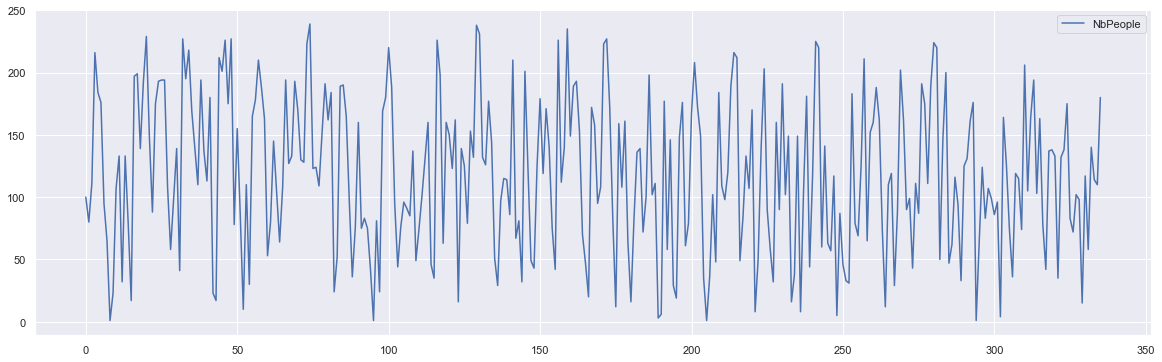

In [ ]:
raw_csv_data=pd.read_csv("mockup.csv")
df=raw_csv_data.copy()

df.plot(figsize=(20,6))
plt.show()

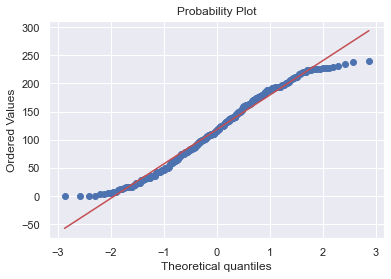

In [ ]:
scipy.stats.probplot(df.NbPeople,plot=pylab)
pylab.show()

In [ ]:
df.describe()

,NbPeople
count,336.000000
mean,118.157738
std,61.451853
min,1.000000
25%,73.750000
50%,116.500000
75%,169.000000
max,239.000000


In [ ]:
df.head()

,Date,NbPeople
0,1/1/2021,100
1,2/1/2021,80
2,3/1/2021,111
3,4/1/2021,216
4,5/1/2021,184


In [ ]:
df.Date=pd.to_datetime(df.Date,dayfirst=True)
df.set_index("Date",inplace=True)

In [ ]:
df.sort_values(by='Date')
df

,NbPeople
Date,
2021-01-01,100
2021-01-02,80
2021-01-03,111
2021-01-04,216
2021-01-05,184
...,...
2021-12-24,58
2021-12-25,140
2021-12-26,114


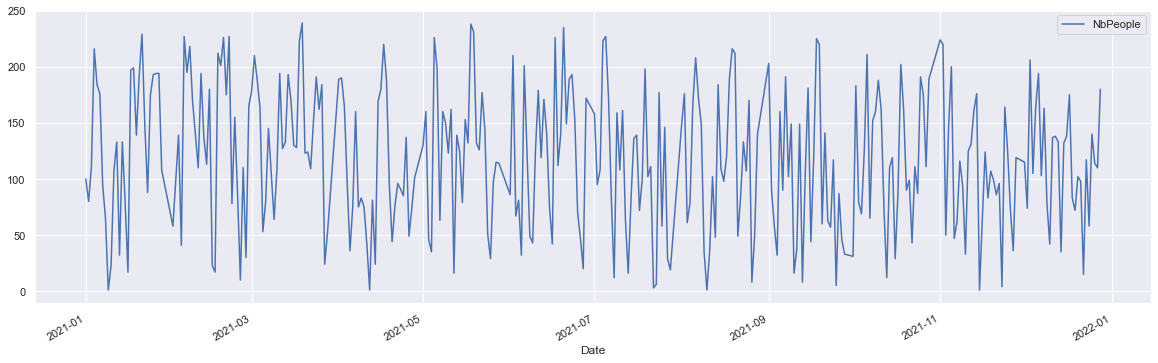

In [ ]:
df.plot(figsize=(20,6))
plt.show()

In [ ]:
df.head()

,NbPeople
Date,
2021-01-01,100
2021-01-02,80
2021-01-03,111
2021-01-04,216
2021-01-05,184


In [ ]:
df.describe()
df=df.asfreq("b")
df.NbPeople=df.NbPeople.fillna(method="bfill")

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()
sts.adfuller(df.NbPeople)

(-11.813719556256013,
 8.737707409700081e-22,
 0,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 2661.783271811197)

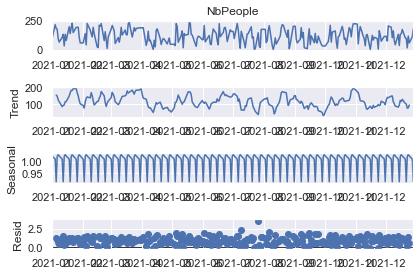

In [ ]:
s_dec_multiplicative=seasonal_decompose(df.NbPeople,model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

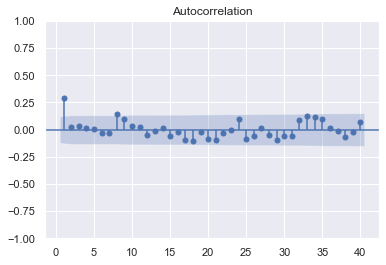

In [ ]:
sgt.plot_acf(df.NbPeople,lags=40,zero=False)
plt.show()

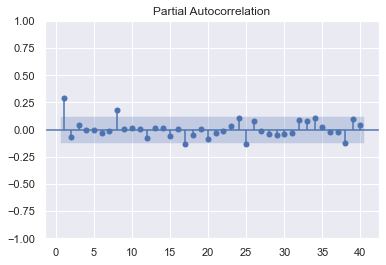

In [ ]:
sgt.plot_pacf(df.NbPeople, lags=40, zero=False,method=("ols"))
plt.show()

In [ ]:
!python -m pip install statsmodels 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_ar=ARIMA(df.NbPeople,order=(1,0,0))
results_ar=model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               NbPeople   No. Observations:                  258
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1421.864
Date:                Sat, 20 Nov 2021   AIC                           2849.728
Time:                        10:14:12   BIC                           2860.387
Sample:                    01-01-2021   HQIC                          2854.014
                         - 12-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.1423      5.249     22.508      0.000     107.855     128.430
ar.L1          0.2898      0.063      4.636      0.000       0.167       0.412
sigma2      3582.7990    436.811      8.202      0.000    2726.664    4438.934
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 8.62
Prob(Q):                              0.75   Prob(JB):                         0.01
Heteroskedasticity (H):               0.98   Skew:                            -0.01
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_2=ARIMA(df.NbPeople,order=(2,0,0))
results_ar_2=model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               NbPeople   No. Observations:                  258
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1421.293
Date:                Sat, 20 Nov 2021   AIC                           2850.586
Time:                        10:14:54   BIC                           2864.798
Sample:                    01-01-2021   HQIC                          2856.301
                         - 12-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.1309      4.917     24.027      0.000     108.494     127.767
ar.L1          0.3094      0.067      4.612      0.000       0.178       0.441
ar.L2         -0.0667      0.069     -0.968      0.333      -0.202       0.068
sigma2      3567.1816    433.908      8.221      0.000    2716.738    4417.625
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.53
Prob(Q):                              0.95   Prob(JB):                         0.01
Heteroskedasticity (H):               0.98   Skew:                            -0.01
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# AR(3)
model_ar_3=ARIMA(df.NbPeople,order=(3,0,0))
results_ar_3=model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               NbPeople   No. Observations:                  258
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1421.043
Date:                Sat, 20 Nov 2021   AIC                           2852.085
Time:                        10:15:07   BIC                           2869.850
Sample:                    01-01-2021   HQIC                          2859.229
                         - 12-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.1241      5.127     23.038      0.000     108.075     128.173
ar.L1          0.3121      0.067      4.643      0.000       0.180       0.444
ar.L2         -0.0804      0.072     -1.115      0.265      -0.222       0.061
ar.L3          0.0443      0.062      0.714      0.475      -0.077       0.166
sigma2      3554.7829    430.977      8.248      0.000    2710.084    4399.482
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.36
Prob(Q):                              0.99   Prob(JB):                         0.02
Heteroskedasticity (H):               0.97   Skew:                            -0.01
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# AR(4)
model_ar_4=ARIMA(df.NbPeople,order=(4,0,0))
results_ar_4=model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               NbPeople   No. Observations:                  258
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -1421.036
Date:                Sat, 20 Nov 2021   AIC                           2854.073
Time:                        10:15:19   BIC                           2875.391
Sample:                    01-01-2021   HQIC                          2862.645
                         - 12-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.1240      5.102     23.154      0.000     108.125     128.123
ar.L1          0.3125      0.067      4.639      0.000       0.180       0.444
ar.L2         -0.0809      0.073     -1.114      0.265      -0.223       0.061
ar.L3          0.0464      0.066      0.704      0.481      -0.083       0.175
ar.L4         -0.0069      0.063     -0.108      0.914      -0.131       0.117
sigma2      3560.2073    434.097      8.201      0.000    2709.393    4411.022
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.40
Prob(Q):                              0.99   Prob(JB):                         0.01
Heteroskedasticity (H):               0.97   Skew:                            -0.01
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from scipy.stats import chi2
def llr_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [ ]:
print(llr_test(model_ar,model_ar_2))
print(llr_test(model_ar_2,model_ar_3))
print(llr_test(model_ar_3,model_ar_4))

0.285
0.479
0.911


In [ ]:
# AR(9)
model_ar_9=ARIMA(df.NbPeople,order=(9,0,0))
results_ar_9=model_ar_9.fit()
results_ar_9.summary()
# AR(10)
model_ar_10=ARIMA(df.NbPeople,order=(10,0,0))
results_ar_10=model_ar_10.fit()
results_ar_10.summary()
# AR(11)
model_ar_11=ARIMA(df.NbPeople,order=(11,0,0))
results_ar_11=model_ar_11.fit()
results_ar_11.summary()
# AR(12)
model_ar_12=ARIMA(df.NbPeople,order=(12,0,0))
results_ar_12=model_ar_12.fit()
results_ar_12.summary()
print(llr_test(model_ar_11,model_ar_12))
df_pred_ar=model_ar_12

0.251


In [ ]:
size=int(len(df)*0.8)
df_test=df.iloc[size:] #testing set
df=df.iloc[:size] #training set
df_test.describe()

,NbPeople
count,52.000000
mean,118.538462
std,58.232954
min,1.000000
25%,81.750000
50%,115.000000
75%,163.250000
max,224.000000


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_ar = ARIMA(df.NbPeople, order = (1,0,0))
results_ar = model_ar.fit()

In [ ]:
df.tail()

,NbPeople
Date,
2021-10-11,162.0
2021-10-12,74.0
2021-10-13,12.0
2021-10-14,110.0
2021-10-15,119.0


In [ ]:
start_date = "2021-10-18"
end_date = "2021-10-21"

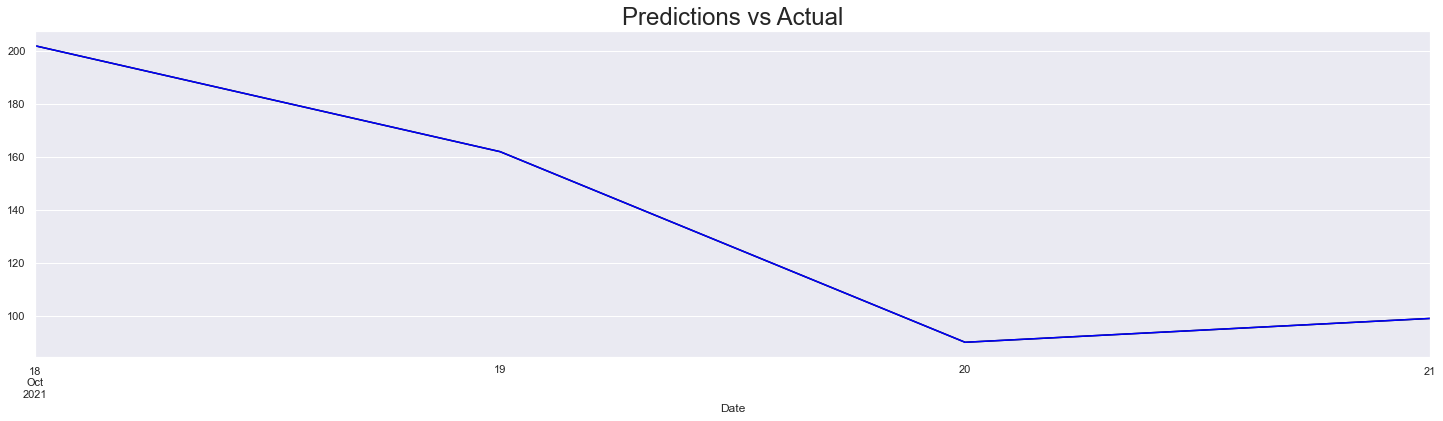

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_ret_sarimax = SARIMAX(df.NbPeople[1:], exog = df[["NbPeople"]][1:], 
                            order = (3,0,4), seasonal_order = (3,0,2,5))
results_ret_sarimax = model_ret_sarimax.fit()

df_pred_sarimax = results_ret_sarimax.predict(start = start_date, end = end_date, 
                                              exog = df_test[["NbPeople"]][start_date:end_date]) 

df_pred_sarimax[start_date:end_date].plot(figsize = (25,6), color = "black")
df_test.NbPeople[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

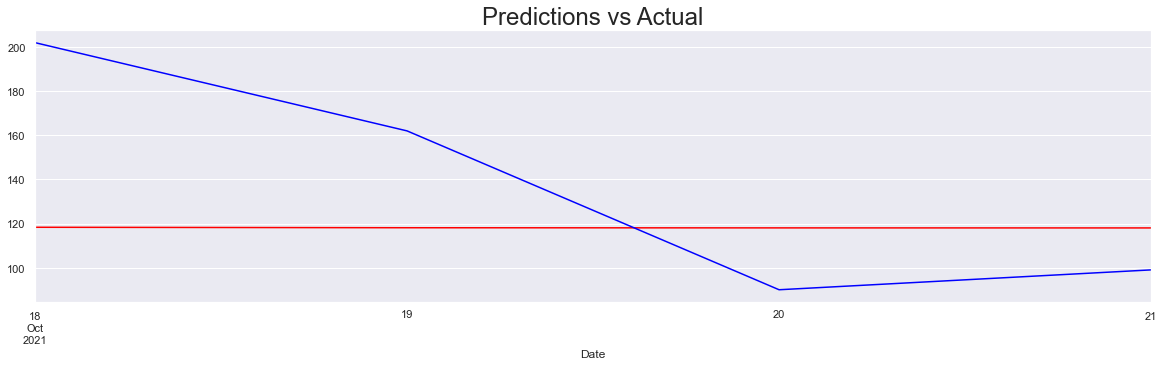

In [ ]:
df_pred = results_ar.predict(start = start_date, end = end_date)
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.NbPeople[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

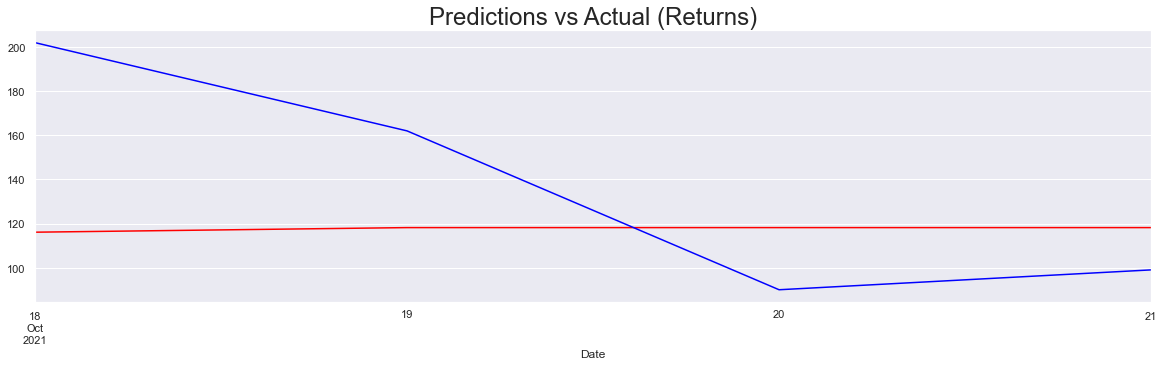

In [ ]:
model_ret_ma = ARIMA(df.NbPeople[1:], order=(0,0,1))
results_ret_ma = model_ret_ma.fit()

df_pred_ma = results_ret_ma.predict(start = start_date, end = end_date) 

df_pred_ma[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_test.NbPeople[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

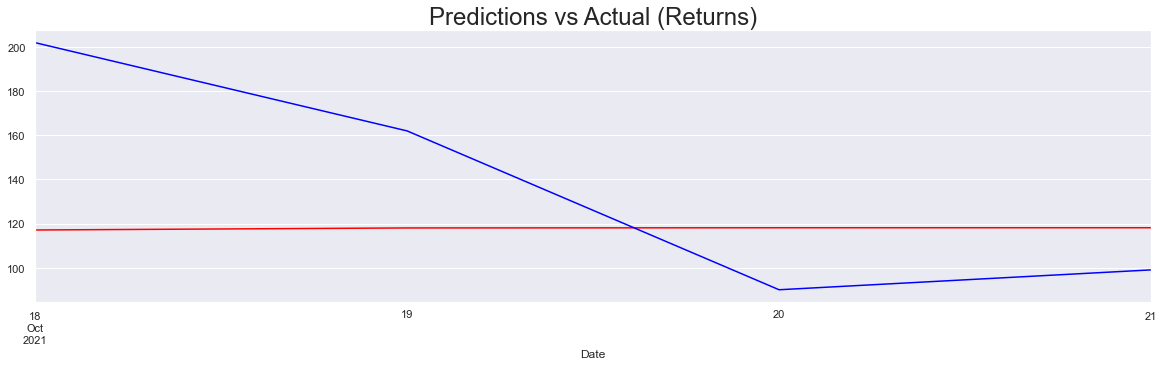

In [ ]:
model_ret_arma = ARIMA(df.NbPeople[1:], order=(1,0,1))
results_ret_arma = model_ret_arma.fit()

df_pred_arma = results_ret_arma.predict(start = start_date, end = end_date)

df_pred_arma[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_test.NbPeople[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

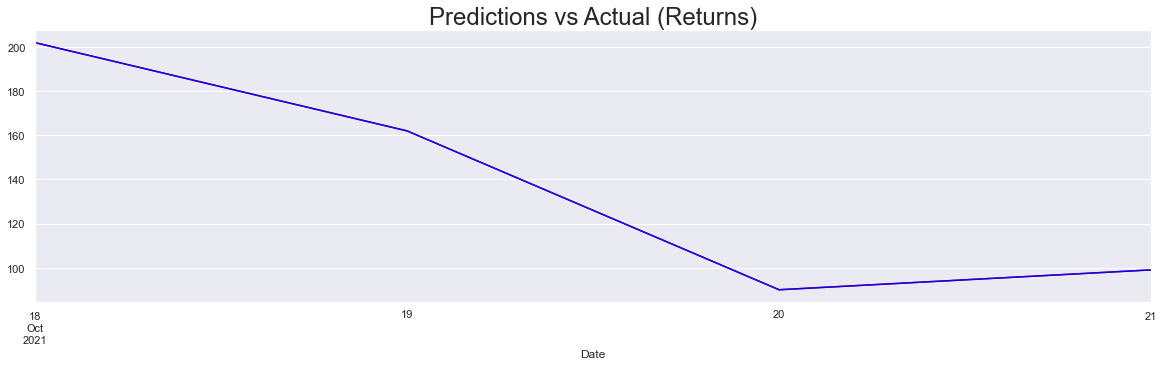

In [ ]:
model_ret_armax = ARIMA(df.NbPeople[1:], exog = df[["NbPeople"]][1:], order = (1,0,1))
results_ret_armax = model_ret_armax.fit()

df_pred_armax = results_ret_armax.predict(start = start_date, end = end_date, 
                                          exog = df_test[["NbPeople"]][start_date:end_date]) 

df_pred_armax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.NbPeople[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

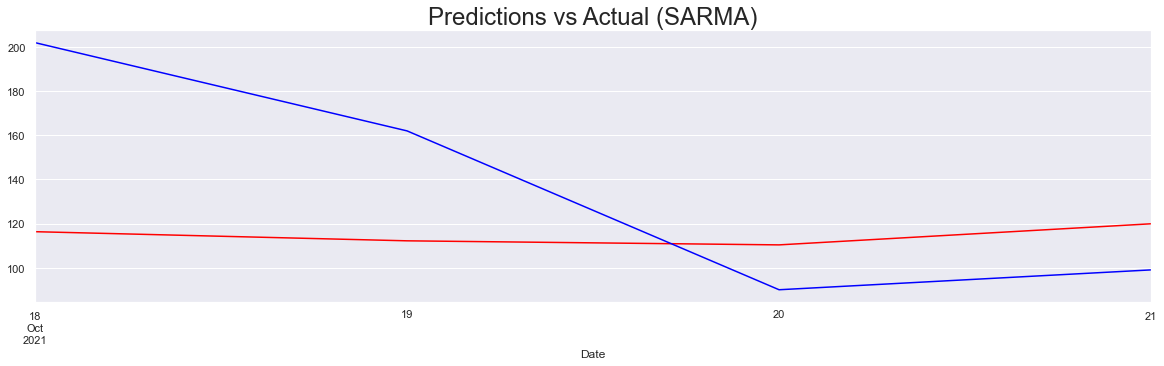

In [ ]:
model_ret_sarma = SARIMAX(df.NbPeople[1:], order = (3,0,4), seasonal_order = (3,0,2,5))
results_ret_sarma = model_ret_sarma.fit()

df_pred_sarma = results_ret_sarma.predict(start = start_date, end = end_date)

df_pred_sarma[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.NbPeople[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (SARMA)", size = 24)
plt.show()

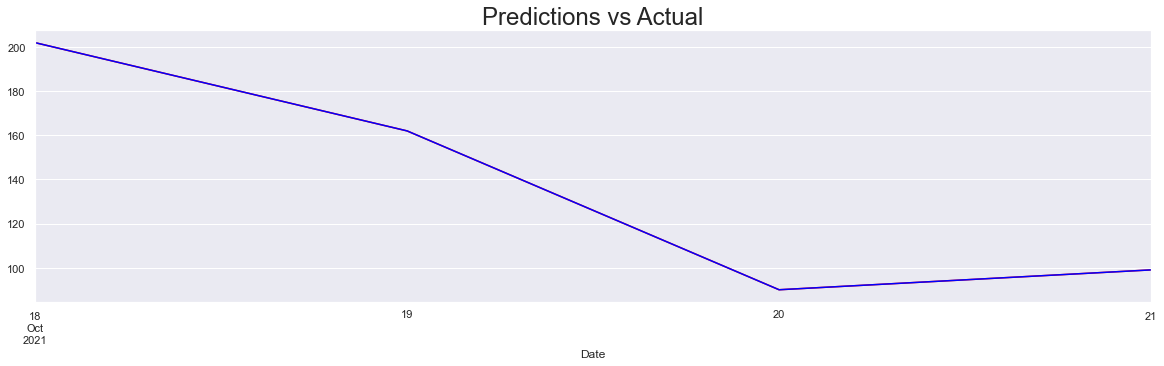

In [ ]:
model_ret_sarimax = SARIMAX(df.NbPeople[1:], exog = df[["NbPeople"]][1:], 
                            order = (3,0,4), seasonal_order = (3,0,2,5))
results_ret_sarimax = model_ret_sarimax.fit()

df_pred_sarimax = results_ret_sarimax.predict(start = start_date, end = end_date, 
                                              exog = df_test[["NbPeople"]][start_date:end_date]) 

df_pred_sarimax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.NbPeople[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

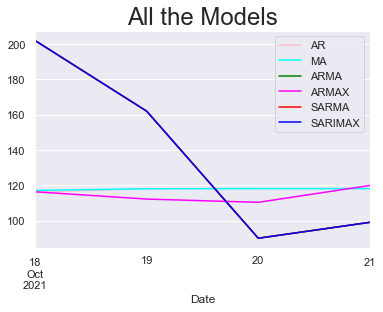

In [ ]:
#results_ar_12[start_date:end_date].plot(figsize = (20,10), color = "yellow")
df_pred_ma[start_date:end_date].plot(color = "pink")
df_pred_arma[start_date:end_date].plot(color = "cyan")
df_pred_armax[start_date:end_date].plot(color = "green")
df_pred_sarma[start_date:end_date].plot(color = "magenta")
df_pred_sarimax[start_date:end_date].plot(color = "red")
df_test.NbPeople[start_date:end_date].plot(color = "blue")
plt.legend(['AR','MA','ARMA','ARMAX','SARMA','SARIMAX'])
plt.title("All the Models", size = 24)
plt.show()

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
from arch import arch_model
model_auto = auto_arima(df.NbPeople[1:], exogenous = df[['NbPeople']][1:],m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)

In [ ]:
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test[start_date:end_date]),
                            exogenous = df_test[['NbPeople']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

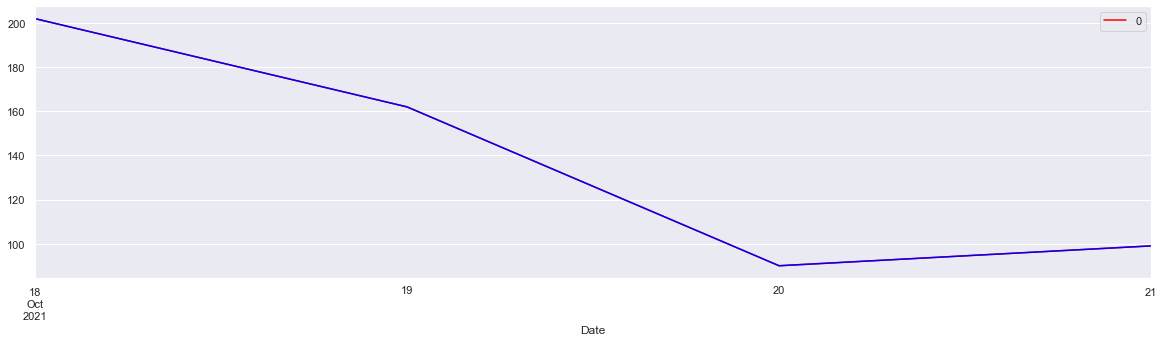

In [ ]:
df_auto_pred.plot(figsize = (20,5), color = "red")
df_test.NbPeople[start_date:end_date].plot(color = "blue")
plt.show()